<a href="https://colab.research.google.com/github/RusAl84/IntroML/blob/master/11_%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D1%8F_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дерево принятия решений
На предыдущих занятиях мы познакомились с некоторыми методами машинного обучения - линейной и логистической  регрессиями. У этих, и у многих других методов, есть недостаток - результаты метода слабо понятны обычному человеку, или как говорят *слабо интерпретируемы*.

Действительно как объяснить человеку что

0.5 * (рост) + 0.9 * (вес) - 0.013 * (есть хвост) > 5 это слон, а 

0.5 * (рост) + 0.9 * (вес) - 0.013 * (есть хвост) < 5 это собака?

Как вообще можно складывать величины разной размерности рост в метрах и вес в килограммах, на уроках физики нам говорили что так нельзя, а здесь в линейной регрессии именно так и происходит. Хоть эти методы могут давать хорошие результаты, но объяснимость их очень маленькая. 

Человек думает и принимает решения по другому. ЕСЛИ сегодня выходной ТОГДА я не пойду в школу. ЕСЛИ мне поставят оценку больше 3 ТОГДА я буду хорошим учеником ИНАЧЕ плохим. 

Подобным образом на основе правил вида "ЕСЛИ ... ТОГДА ... ИНАЧЕ" (IF...THEN...ELSE...) рассуждает человек и это ему понятно. Вот бы и компьютер заставить думать также. Хм, но именно так мы пишем программы для компьютера, знакомая конструкция любого языка программирования, не правда ли?

Одного правила для принятия решения может быть не достаточно - тогда можем применить несколько правил, например:
```
ЕСЛИ оценка больше 4
ТОГДА отдыхать
ИНАЧЕ ЕСЛИ оценка больше 3
----- ТОГДА немножко подучить
----- ИНАЧЕ ЕСЛИ оценка больше 2
----------- ТОГДА учиться очень усердно
----------- ИНАЧЕ придется отчисляться
```
Раз мы можем написать такие правила для нашего решения, тогда что мешает это сделать компьютеру?

Для любой задачи, например классификации чего-нибудь, можем построить такие правила в виде некоторой иерархии. Пример на рисунке ниже.

Используя некоторую информацию об автовладельцах - атрибуты или признаки - страховая компания принимает решение страховать или нет такого автовладельца.

![img](https://drive.google.com/uc?id=1XuKxi0uZNJOSk9GqKDMgi7-ILXv9MYrO)

Изображения иерархии подобных правил напоминают изображение дерева (перевернутого вверх корнем), поэтому так и называются - **дерево принятия решений**. Места разветвлений - узлы, конечные узлы, которые уже не разветвляются - листья. Самый первый (верхний) узел - корень дерева. Это просто названия и никакой связи с биологическими деревьями нет.  В принципе деревья могут быть разной структуры, но мы будем говорить только о деревьях с ответами правил типа ДА\НЕТ.

## Обучение (создание) дерева

Когда дерево уже кем-то создано, мы можем им пользоваться без проблем, проверяя правила и таким образом выискивая подходящее решение.

Но дерево нужно создать, обучить. Для этого придумано множество методов, мы рассмотрим только один метод ["CART"](https://scikit-learn.org/stable/modules/tree.html#tree-algorithms)        (Classification and Regression Trees) реализованный в библиотеке `sklearn`. 

Пусть, как и обычно в задачах классификации с учителем, имеется L обучающих векторов примеров входов \\(x^l\\) с n компонентами (атрибутами) каждый и столько же меток y описывающих класс, к которому относится каждый из примеров. Будем рассматривать только правила с ответами ДА/НЕТ и условиями вида \\(x_i^l \leq t_i\\),  t - некоторые пороги для атрибутов.

Для построения каждого узла дерева возьмем один из атрибутов (компонент входа) и сравним его с порогом. Разделим все обучающие примеры Q этого узла на две части, выборки, в одну Ql (левую) войдут примеры у которых условие \\(x_i^l \leq t_i\\) выполняется, а в другую Qr (правую) примеры у которых условие не выполняется. 
Посчитаем для этих двух выборок некоторую величину H(), называемую *неопределенность* (impurity, еще называют ее "загрязненность", "неточность", "критерий") и общую неопределенность узла

G = (число примеров в Ql)/(общее число примеров в Q)* H(Ql)+ (число примеров в Qr)/(общее число примеров в Q)* H(Qr).

И сделаем это для всех атрибутов и всех возможных значений порога этих атрибутов. Выберем такой атрибут и порог, для которых G минимально. По ним и будем окончательно строить узел.

Начиная с корня, в котором присутствуют все обучающие примеры \\(x^l\\), будем создавать новые и новые узлы, постепенно разбивая набор этих примеров на меньшие части по выбранным атрибутам и порогам пока не останется в каждом узле по одному примеру, или не выполнятся другие критерии останова обучения.

Так и получится дерево решений.

Реализовано несколько разных критериев *H()*. Такой критерий должен давать маленькое число, если мы смогли за одно разделение отделить классы полностью (идеальное разделение) и большое, если число примеров разного класса в разделенных множествах примерно одинаково (бесполезное разделение), например:

А) Для задач классификации на K классов:

1) *Неопределенность Джини*: для каждого класса считаем долю (p) примеров этого класса во всех примерах (их \\(N_m\\) штук) узла m (метки *y* представлены целыми числами от 0 до K-1) и считаем H() как 

$ p_k=\frac{1}{N_m}* \sum_{x_i \in Q_m} I(y_i=k), I=1\ если \ совпадает, \ 0 \ если  \ не \  совпадает \\
\\ H = \sum_{k} p_k*(1-p_k) \\ $

2) *Энтропия*:

$ H = - \sum_{k} p_k*log(p_k) \\ $

3) *Ошибка классификации*: 

$ H = 1-max(p_k) \\ $

Б) Для задач регрессии обычно используют среднеквадратичную ошибку:
сначала ищут среднее значение меток y в примерах узла m

$ y_{mean} = \frac{1}{N_m} \sum_{i\in N_m} y_i \\ $

а потом ищут среднеквадратичную ошибку

$ H =  \frac{1}{N_m} \sum_{i\in N_m} (y_i-y_{mean})^2 \\ $

Прекрасную анимацию создания дерева можно найти [здесь](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/).

Давайте реализуем классификатор на основе дерева для примеров [ирисов Фишера](https://ru.wikipedia.org/wiki/Ирисы_Фишера#Описание). В библиотеке `sklearn` есть модуль `tree` с различными функциями для деревьев, используем от туда [`DecisionTreeClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) для создания классификатора. Синтаксис его аналогичен другим классификаторам: команда `fit()` для обучения, `predict()` для расчета выходов. Для отображения дерева используем команду `plot_tree()` (она вернет и текстовое описание дерева), которая покажет для каждого узла выбранный атрибут (как индекс входного массива), порог, число примеров в узле общее (samples) и по классам (values), значение критерия (здесь gini).      

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

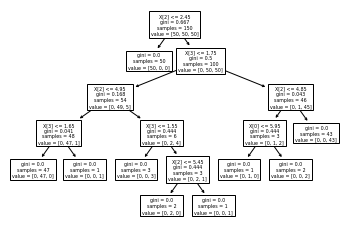

In [ ]:
from sklearn.datasets import load_iris # примеры данных 
from sklearn import tree # модуль для деревьев
iris = load_iris() # загружаем данные
X=iris.data # примеры входов
y=iris.target # метки (примеры выходов)
clf = tree.DecisionTreeClassifier() # создаем классификатор на основе дерева
clf = clf.fit(X, y) # обучаем его, т.е. создаем само дерево
tree.plot_tree(clf) # отображаем

### `graphviz`
Для более наглядного отображения деревьев рекомендуется использовать библиотеку [`graphviz`](https://graphviz.org/), которая позволяет сохранять и отображать деревья в специальном формате **DOT**.


Примечание: Нужно установить и библиотеку и ее исполняемые файлы, не забыть прописать путь к ней в системную переменную PATH.

In [ ]:
import graphviz # подключаем библиотеку для отображения деревьев
dot_data = tree.export_graphviz(clf, out_file=None) # конвертируем в DOT (в переменную или в файл) 
graph = graphviz.Source(dot_data)  # загружаем дерево из переменной или файла в представление graphviz
graph.render("iris") # отображаем в файл (по умолчанию pdf)

'iris.pdf'

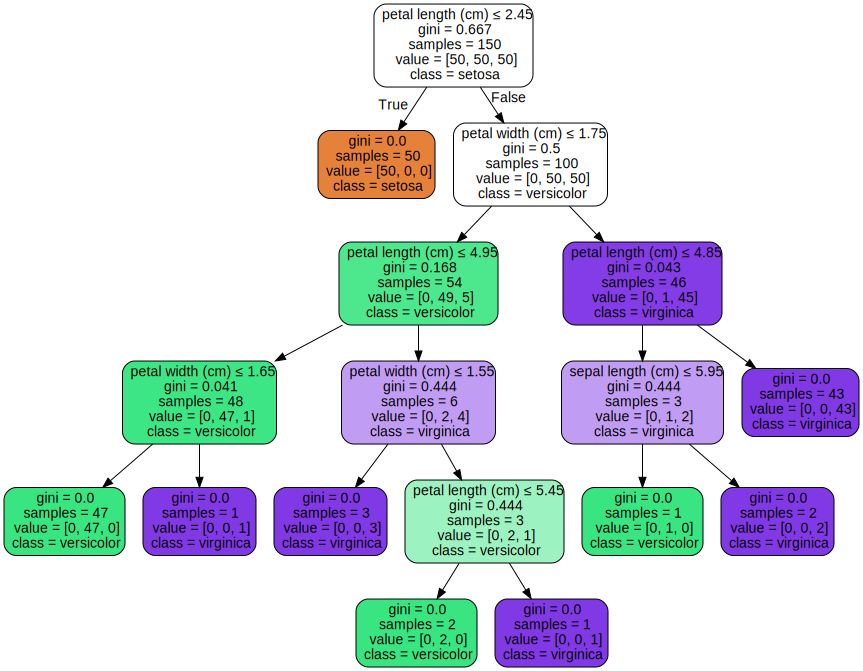

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,  # можем указать дополнительные опции конвертации
                     feature_names=iris.feature_names, #  названия атрибутов
                     class_names=iris.target_names,   # названия классов
                     filled=True, rounded=True,  # прочие детали отображения
                     special_characters=True)  #
graph = graphviz.Source(dot_data)  # # загружаем дерево из переменной или файла в представление graphviz
graph  # отображаем на экране

Функция `export_text()` из того же модуля `sklearn.tree` позволяет отобразить дерево в форматированном текстовом виде правил ЕСЛИ...ТОГДА...ИНАЧЕ  

In [ ]:
from sklearn.tree import export_text # подключаем функцию
r = export_text(clf, feature_names=iris['feature_names']) # переводим дерево в текстовую строку
print(r) # печатаем

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



### Разделяющая поверхность
Раз деревом можно решать задачу классификации, то оно реализует какую-то разделяющую поверхность. Зная устройство дерева подумайте немного, как выглядит эта поверхность (на двумерном примере проще всего).

Подумали? Теперь выполните код ниже, чтобы убедиться, что разделяющая поверхность для дерева в двумерном случае это набор прямоугольников, возможно вырожденных в линию или точку. 

Чтобы можно было отобразить на плоскости, будем строить несколько деревьев для пар атрибутов и рисовать разделяющие поверхности.


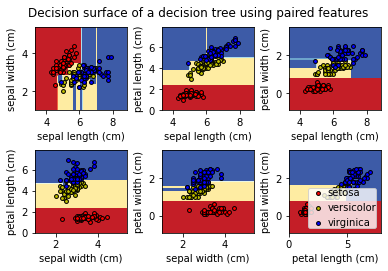

In [ ]:
import numpy as np #
import matplotlib.pyplot as plt #

from sklearn.datasets import load_iris #
from sklearn.tree import DecisionTreeClassifier, plot_tree #

# Parameters
n_classes = 3 # число классов
plot_colors = "ryb" # цвета
plot_step = 0.02 # шаг для симуляции на плоскости

# Load data
iris = load_iris() # загружаем данные

# в цикле по числу пар атрибутов 
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    
    X = iris.data[:, pair] # Выбираем заданные пары атрибутов
    y = iris.target # метки

    # Обучение
    clf = DecisionTreeClassifier().fit(X, y) # обучаем дерево на текущей паре атрибутов

    # Строим графики
    plt.subplot(2, 3, pairidx + 1) # подграфик для текущей пары

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # немного измененные минимальное и максимальые значения превого атрибута 
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # немного измененные минимальное и максимальые значения второго атрибута 
    # считаем прямоугольную сетку возможных значений этих атрибутов
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), #
                         np.arange(y_min, y_max, plot_step)) #
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5) # более компактный график
    
    # считаем выход классификатора для всех примеров сетки
    # не забыв что массивы данных нужно привести к требуемому размеру.
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape) # и преобразуем обратно к исходному размеру
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu) # рисуем контурную карту

    plt.xlabel(iris.feature_names[pair[0]]) # добавляем подписи осей
    plt.ylabel(iris.feature_names[pair[1]]) #

    # Отображаем обучающие примеры своим цветом
    for i, color in zip(range(n_classes), plot_colors): # в цикле по количеству классов
        idx = np.where(y == i) # отбираем все точки текущего класса 
        # отображаем их своим цветом
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], #
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15) #

plt.suptitle("Decision surface of a decision tree using paired features") # подписываем график
plt.legend(loc='lower right', borderpad=0, handletextpad=0) # легенда
plt.axis("tight"); # отображение осей

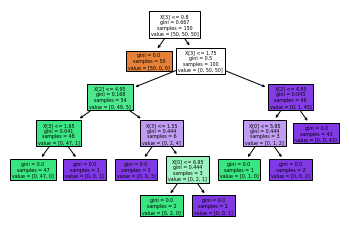

In [ ]:
# построим и отобразим дерево для всех 3 классов.
plt.figure() #
clf = DecisionTreeClassifier().fit(iris.data, iris.target) #
plot_tree(clf, filled=True) #
plt.show() #

Еще более красивая и наглядная визуализация деревьев возможна с помощью библиотеки [`dtreeviz`](https://github.com/parrt/dtreeviz). Но мы оставим ее изучение на самостоятельную работу.

# Задание и обсуждение
Пробуйте изменять параметры дерева и смотрите как это влияет на качество решения задачи.
Попробуйте на своих данных.